### remove labels where little semantics are assigned to the patch

In [1]:
scan_dir = "/scratch/quanta/Experiments/feature-instance-fusion-02/scannet_scene0000_00/"


In [2]:
import os 
patch_dir = scan_dir + 'patch_corres_ext-grounded_sam_kmeans-ext-random_grounded_sam'
names = os.listdir(patch_dir)
names.sort()


In [3]:
import numpy as np
import torch

merged_label_mapping_pth = scan_dir + "graph_connect_etx-grounded_sam_kmeans-ext-random_grounded_sam_SVP/patch_to_label_mapping.pt"
label_mapping = torch.load(merged_label_mapping_pth)


In [4]:
from tqdm import tqdm
counts = torch.zeros(size=(label_mapping.unique().shape[0],), dtype=torch.int64)

for name in tqdm(names):
    patch_corres = torch.load(patch_dir + '/' + name)['patch_corres']

    for corres in patch_corres:
        if corres['most_likely_maskid'] != 0:
            counts[label_mapping[corres['patch_id']]] += 1


100%|██████████| 5577/5577 [00:31<00:00, 174.93it/s]


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  5.,  1.,  4.,  1.,  8., 11.,  8., 11., 12.,
        17., 28., 21., 23., 20., 30., 54., 40., 49., 61., 51., 20.,  9.,
         8.,  5.,  6.,  4.,  2.,  2.,  3.,  1.,  0.,  0.,  1.]),
 array([-4.60517019, -4.3019698 , -3.99876942, -3.69556904, -3.39236865,
        -3.08916827, -2.78596788, -2.4827675 , -2.17956712, -1.87636673,
        -1.57316635, -1.26996597, -0.96676558, -0.6635652 , -0.36036482,
        -0.05716443,  0.24603595,  0.54923633,  0.85243672,  1.1556371 ,
         1.45883749,  1.76203787,  2.06523825,  2.36843864,  2.67163902,
         2.9748394 ,  3.27803979,  3.58124017,  3.88444055,  4.18764094,
         4.49084132,  4.79404171,  5.09724209,  5.40044247,  5.70364286,
         6.00684324,  6.31004362,  6.61324401,  6.91644439,  7.21964477,
         7.52284516,  7.82604554,  8.12924592,  8.43244631,  8.73564669,
         9.03884708,  9.34204746,  9.64524784,  9.94844823,

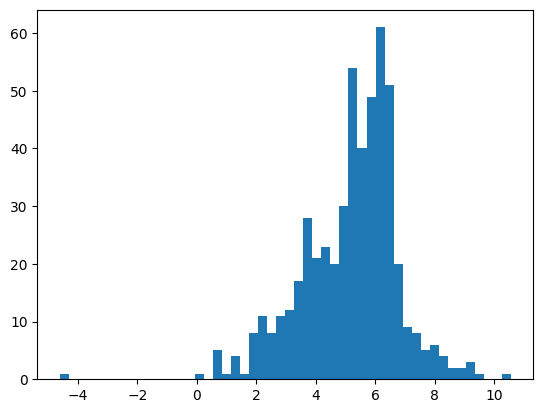

In [5]:
import matplotlib.pyplot as plt

plt.hist(np.log(np.array(counts) + 0.01), bins=50)
# plt.hist(np.array(counts), bins=20)


In [27]:
label_mapping[counts[label_mapping] == 0] = 0


tensor([ True, False, False,  ..., False, False, False])